In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [3]:
train = pd.read_csv("train.csv", index_col = 'PassengerId')

In [4]:
print(train.shape)
print('-'*40)
print(train.info())
print('-'*50)
print(train.describe())
print('-'*50)
print(train.describe(include=['O']))
print('-'*50)
print(train.head(5))

(891, 11)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
--------------------------------------------------
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381

In [5]:
(train.isnull().sum().sort_values(ascending=False)*100)/train.shape[0]

Cabin       77.104377
Age         19.865320
Embarked     0.224467
Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
dtype: float64

In [6]:
#deleting of un needed columns
train.drop(['Cabin','Ticket','Name'], axis=1 ,inplace=True)

In [7]:
#Imputing missing values for Age variable with the mean

train.Age = train.Age.fillna(train.Age.median())

In [8]:
#Imputing missing values for Embarked variable with the most frequent

train = train.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [9]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train['Embarked'] = train['Embarked'].map( {'Q': 0, 'C': 1,'S':2} ).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,2
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,2


In [10]:
X = train.drop('Survived',axis=1)
y = train['Survived']

# 1 . Logistique Regression

In [14]:
lr = LogisticRegression(max_iter=500)
scores_lr = cross_val_score(lr, X, y, cv = 8)
print(scores_lr.mean(), scores_lr.std())

0.7957388191763193 0.030352610644971884


# 2 . Random Forest

In [15]:
rand = RandomForestClassifier(n_estimators=300, max_depth=10)
scores_rand = cross_val_score(rand, X, y, cv = 6)
print(scores_rand.mean(), scores_rand.std())

0.8316328073039482 0.03725248581062578


# 3 . Decision Tree

In [17]:
tr = DecisionTreeClassifier()
scores_tr = cross_val_score(tr, X, y, cv = 6)
print(scores_tr.mean(), scores_tr.std())

0.7834587943648347 0.047017373381465895


# 4 . Gradient Boosting

In [21]:
grd = GradientBoostingClassifier(n_estimators=300)
scores_grd = cross_val_score(grd, X, y, cv = 8)
print(scores_grd.mean(), scores_grd.std())

0.8283059845559846 0.03268820370907079


In [18]:
#comparing

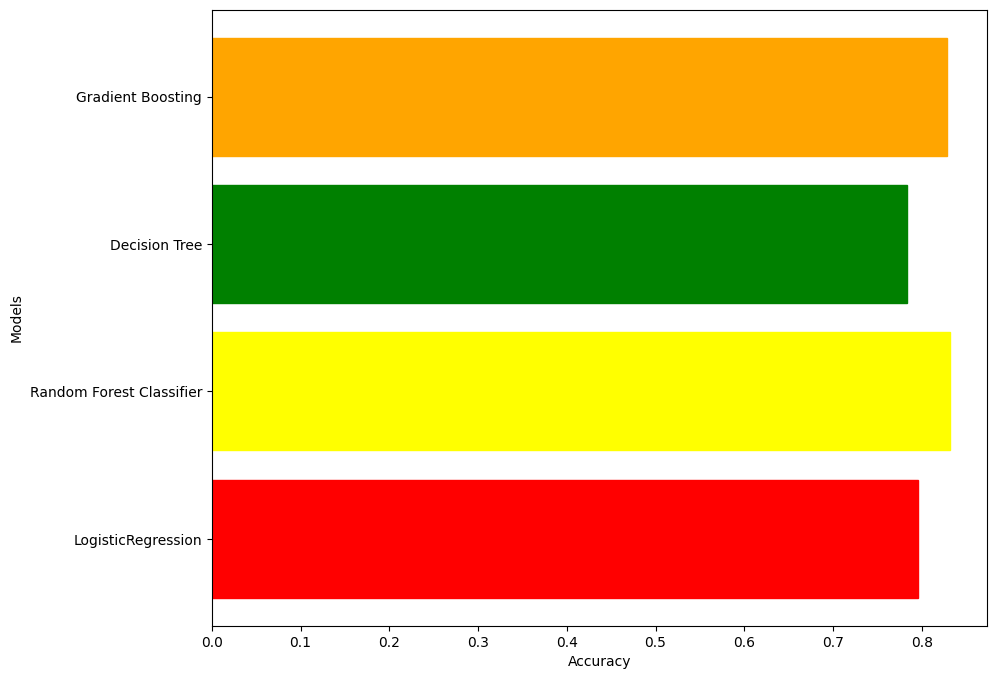

In [27]:
names = ['LogisticRegression' , 'Random Forest Classifier', 
         'Decision Tree', 'Gradient Boosting',]
acc = [scores_lr.mean(), scores_rand.mean(),
      scores_tr.mean(), scores_grd.mean()]

plt.figure(figsize=(10,8))
graph = plt.barh(names,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')    
graph[0].set_color('red')
graph[1].set_color('yellow')
graph[2].set_color('green')
graph[3].set_color('orange')
